In [19]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "cyclistics-data-april-2020-march-2021"
[2] "divvy-trips"                          
[3] "divvytripdata"

# ***Introduction***
    This is one of the case study project from the Google Data Analytics Capstone. The project is to provide a real-world task of a junior data analyst working in a fictional bike-share company, Cyclistic and meet different characters and team members. Following the data analysis process to answer the key business questions.

# ***Stage 0: Information***


# 0.1 Scenario
   As a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# 0.2 Characters and teams
* **Cyclistic**: A bike-share program that features more than 5,800 bicycles and 600 docking stations.
* **Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program.
* **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy.
* **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

# ***Stage 1: Ask***

# 1.1 Business task
Moreno has assigned the task to answer how do annual members and casual riders use Cyclistic bikes differently.

# 1.2 Key Stakeholders
* Lily Moreno
* Cyclistic executive team

# ***Stage 2: Prepare***

# 2.1 Data source
The data is a public data set from a public domain https://divvy-tripdata.s3.amazonaws.com/index.html.

# 2.2 Data organization
The data is organized by ride_id, rideable_type, started_at, ended_at,start_station_name, start_station_id,end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, and member_casual.

# 2.3 Data Credibility
The data is from a public source https://divvy-tripdata.s3.amazonaws.com/index.html. That is being updated still. Lasted updated about month ago for 2023. However, the data is not a first or second, but a third party. The data does contain the answers needed for the business task.

# ***Stage 3: Process***

# 3.1 Tools
Using R due to the large data set that would not work for Excel or spreadsheet. Also, R should provide a reduction on time to find the business task.

Installed and loaded the packages needed.

In [20]:
library(tidyverse)
library(skimr)
library(readr)
library(lubridate)
library(ggplot2)
library(dplyr)
library(data.table)
library(janitor)
library(psych)
library(hrbrthemes)
library(forecast)
library(formattable)

Imported the data as a dataframes.
"q" for quarter and "m" for month.
Data will be using the 2020 for Divvy.

In [21]:
q1 <- read_csv("../input/divvy-trips/Divvy_Trips_2020_Q1.csv")
m4 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202004-divvy-tripdata.csv")
m5 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202005-divvy-tripdata.csv")
m6 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202006-divvy-tripdata.csv")
m7 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202007-divvy-tripdata.csv")
m8 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202008-divvy-tripdata.csv")
m9 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202009-divvy-tripdata.csv")
m10 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202010-divvy-tripdata.csv")
m11 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202011-divvy-tripdata.csv")
m12 <- read_csv("../input/cyclistics-data-april-2020-march-2021/202012-divvy-tripdata.csv")

Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 84776 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 200274 Columns: 13
── Column specification ──────────────────

Combing the data set as one.

In [22]:
new_data <- rbind(q1,m4,m5,m6,m7,m8,m9,m10,m11,m12)

Data cleaning.

In [25]:
colSums(is.na(new_data))
sum(is.na(new_data))

backup_data <- new_data

new_data <- backup_data

new_data <- new_data[complete.cases(new_data), ]
colSums(is.na(new_data))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             94656              95282             110881             111342 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4255               4255 
     member_casual 
                 0

[1] 420671

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                  0                  0 
     member_casual 
                 0

Removing duplicates.

In [26]:
new_data <- distinct(new_data)

Removing data with greater start time than end time.

In [27]:
new_data <- new_data %>%
  filter(started_at < ended_at)

Removing any missing values or null.

In [28]:
new_data <- drop_na(new_data)
new_data <- remove_missing(new_data)

# ***Stage 4: Analyze***

Summarize each of the data.

In [29]:
new_data <- mutate(new_data, date = as.Date(new_data$started_at),
                     start_hour = format(new_data$started_at, format = "%H"),
                     end_hour = format(new_data$ended_at, format = "%H"))

new_data$hours <- difftime(new_data$ended_at, new_data$started_at,
                             units = c("hours"))

new_data$minutes <- difftime(new_data$ended_at, new_data$started_at,
                             units = c("mins"))
new_data <- new_data %>% filter(minutes > 0)

bike_rides <- new_data %>% group_by(weekly = floor_date(date, "week"), start_hour)%>%
  summarise(
    minutes = sum(minutes),
    mean = mean(minutes),
    median = median(minutes),
    max = max(minutes),
    min = min(minutes),
    count = n()
    ) %>% ungroup()


bike_rides$cntMA <- forecast::ma(bike_rides$count,28)
summary(bike_rides$count)

bike_type <- new_data %>% group_by(member_casual,rideable_type,start_hour,weekly = floor_date(date, "week"))%>%
  summarise(
    minutes = sum(minutes),
    mean = mean(minutes),
    median = median(minutes),
    max = max(minutes),
    min = min(minutes),
    count = n()
  ) %>% ungroup()

bike_rides$monthly <- lubridate::month(bike_rides$weekly)

bike_type <- bike_type %>% mutate(month=format(as.Date(bike_type$weekly), "%b_%y"))

`summarise()` has grouped output by 'weekly'. You can override using the
`.groups` argument.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2     461    1560    2666    3805   15285 

`summarise()` has grouped output by 'member_casual', 'rideable_type',
'start_hour'. You can override using the `.groups` argument.


# ***Stage 5: Share***

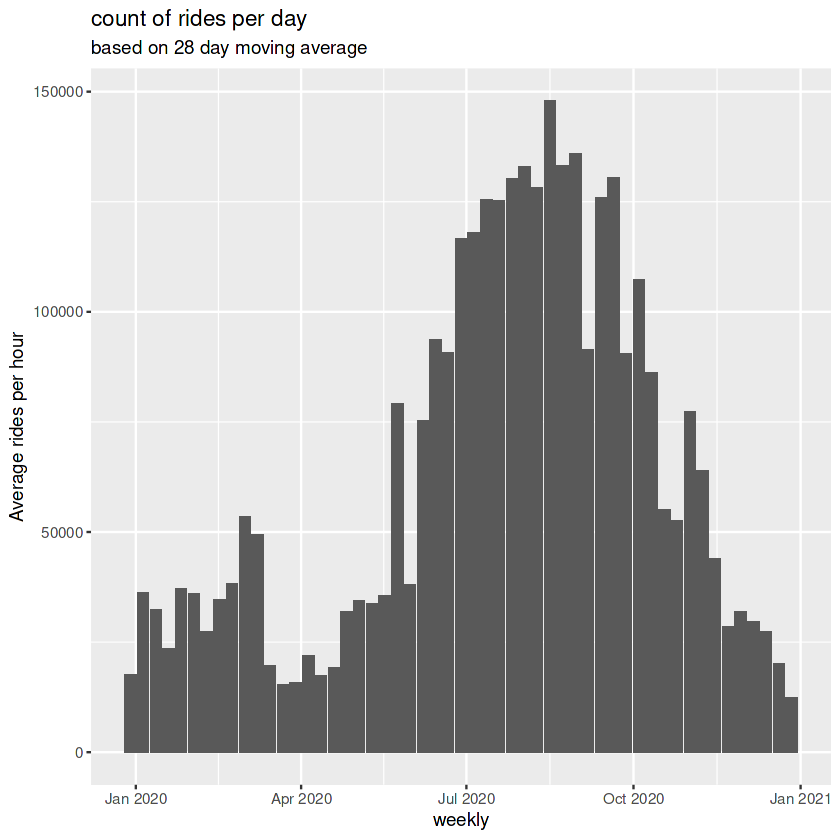

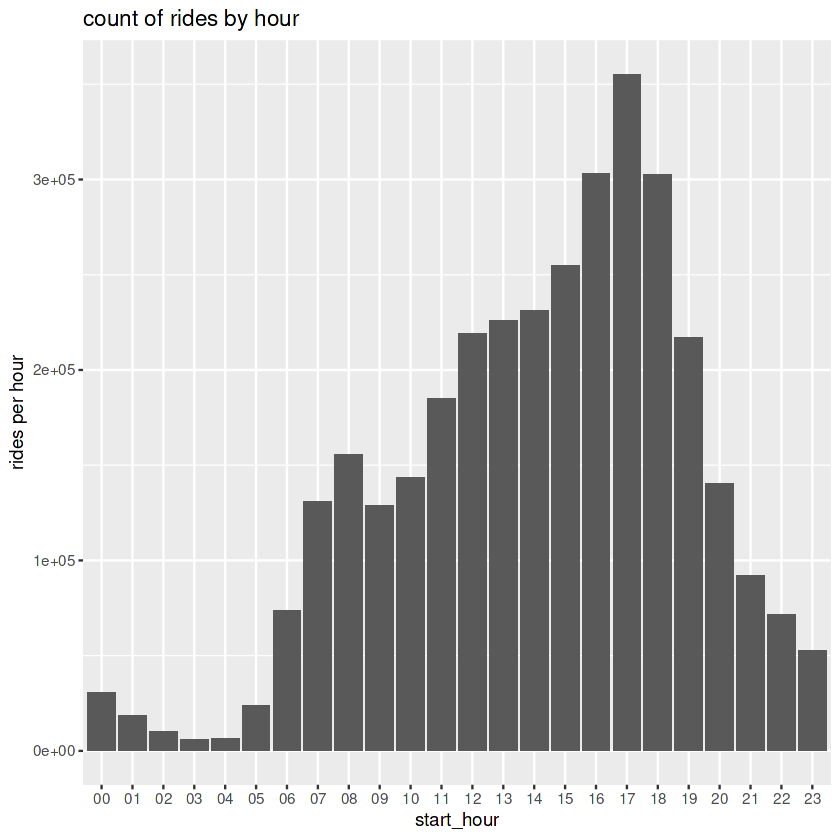

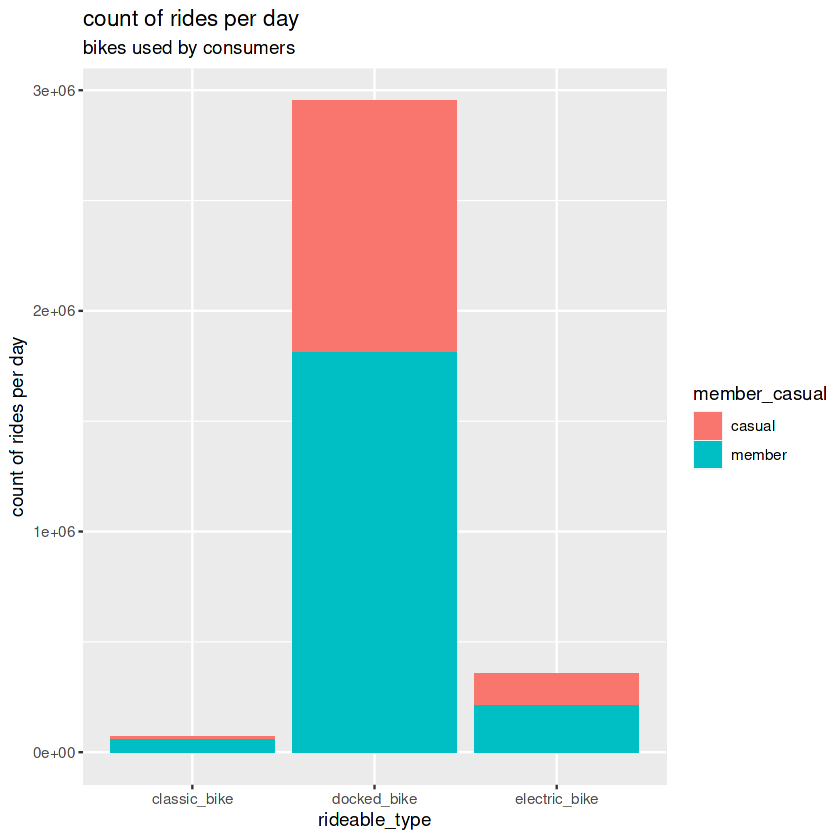

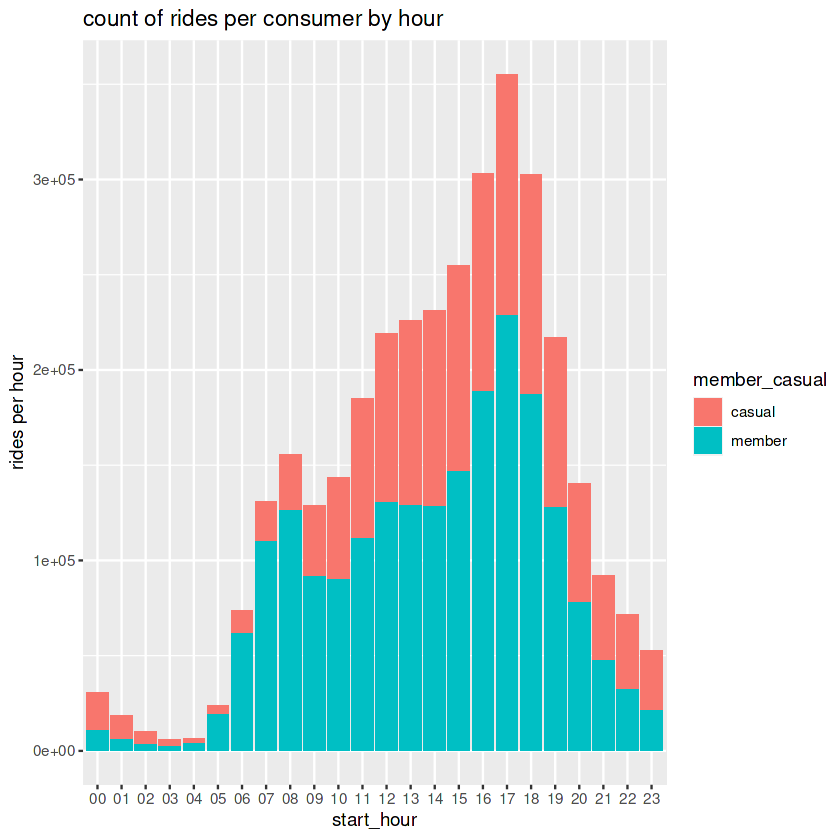

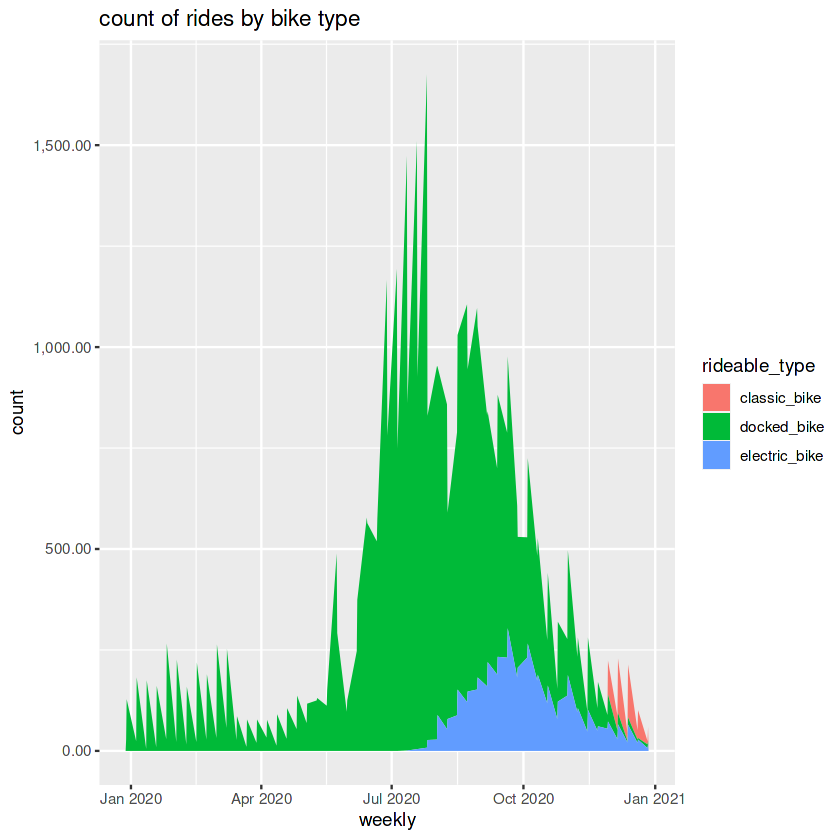

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


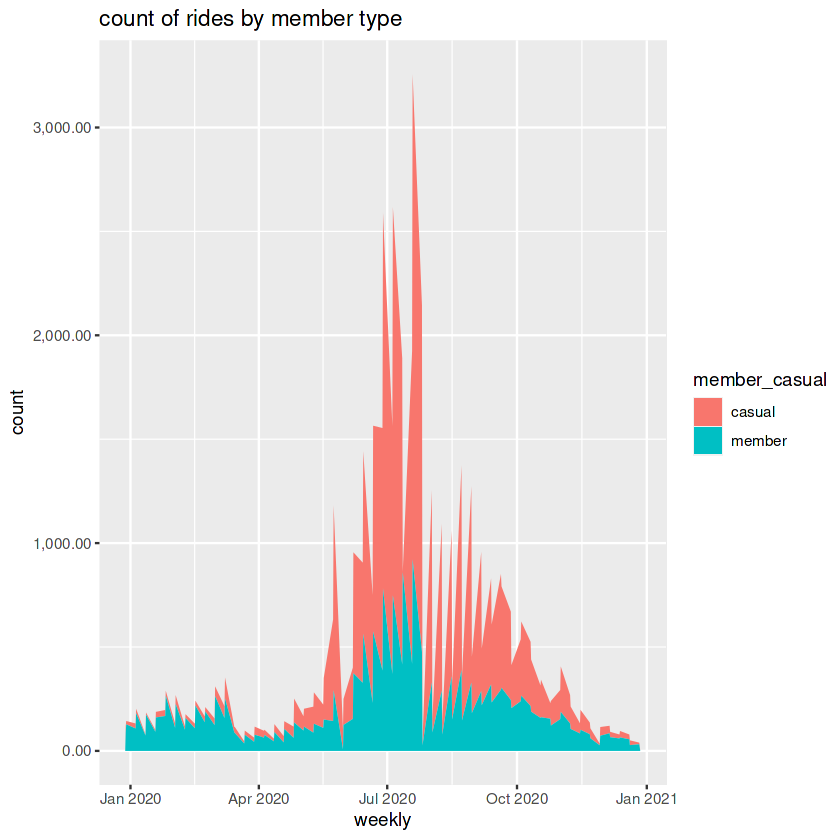

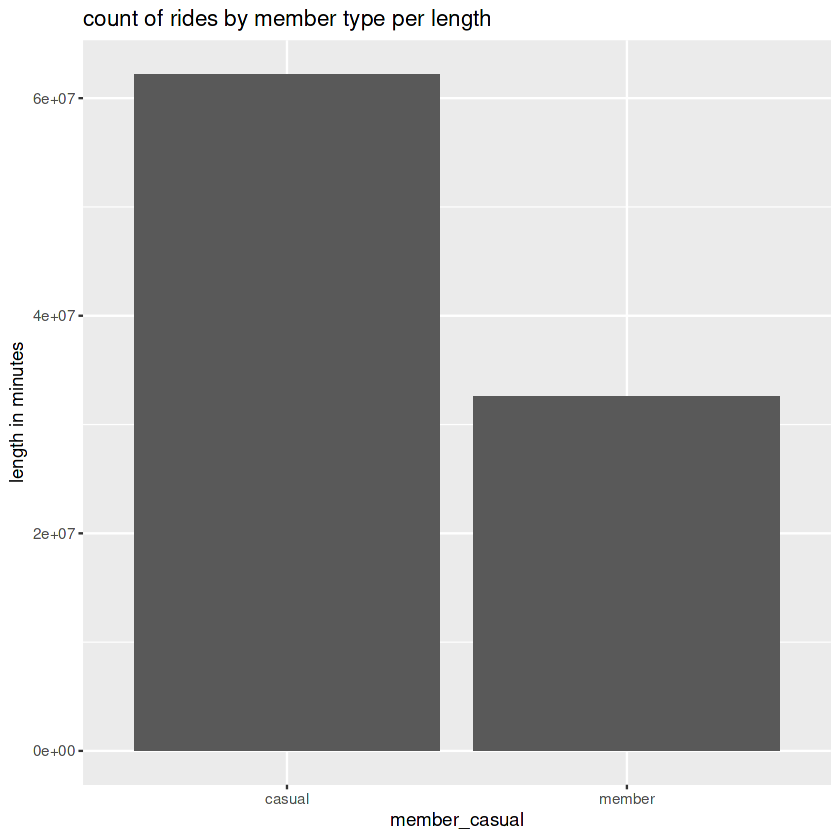

In [30]:
bike_rides %>% ggplot() + geom_col(aes(x=weekly, y=count))+scale_y_continuous()+
  labs(title = "count of rides per day", subtitle = "based on 28 day moving average",
       y="Average rides per hour")

bike_rides %>% ggplot() + geom_col(aes(x=start_hour, y=count))+scale_y_continuous()+
  labs(title = "count of rides by hour",
       y="rides per hour")


bike_type %>% ggplot() + geom_col(aes(x=rideable_type, y=count, fill=member_casual))+scale_y_continuous()+
  labs(title = "count of rides per day", subtitle = "bikes used by consumers",
       y="count of rides per day")

bike_type %>% ggplot() + geom_col(aes(x=start_hour, y=count, fill=member_casual))+scale_y_continuous()+
  labs(title = "count of rides per consumer by hour",
       y="rides per hour")



ggplot(bike_type) + geom_area(aes(x=weekly,y=count, fill=rideable_type)) +
  scale_y_continuous(labels = comma) + labs(title = "count of rides by bike type")

ggplot(bike_type) + geom_area(aes(x=weekly,y=count, fill=member_casual)) +
  scale_y_continuous(labels = comma) + labs(title = "count of rides by member type")

ggplot(bike_type) + geom_col(aes(x=member_casual,y=minutes))+
  labs(title = "count of rides by member type per length", y="length in minutes")

# ***Stage 6: Act***

Based on the data shown above. The annual membership does increase comparing to the first month than the last month of 2020. The benfits of the annual membership seem to help reduces time, rides and more distance than the casuals. So to improve the the number of annual membership. The company need to make the benefits to continue on reducing time, rides and give more distances than the casuals.